# Homework 1. Exploratory Data Analysis, Prob2 GapMinder


Based on Harvard CS109.

All your submitted work should be your own.
---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
[Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML

## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. Submit an Ipython notebook with your original solutions filled in.

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [2]:
#your code here
countries_csv = "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
countries = pd.read_csv(countries_csv)

Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [3]:
#your code here
#income_xlsx = "https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0"
#income_xlsx = "https://docs.google.com/spreadsheets/d/1PybxH399kK6OjJI4T2M33UsLqgutwj3SuYbk7Yt6sxE/pub?gid=0"
income_xlsx = "https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&output=xls"
income = pd.read_excel(income_xlsx)

Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [4]:
#your code here
#income = income.T # transpose the dataframe
#income.columns = income.iloc[0][1:] #Use countries as the columns and remove the countries row

income_transpose = income.T
income_transpose.columns = income_transpose.iloc[0]

income_transpose = income_transpose[1:]
income_transpose = income_transpose.dropna(axis=1,how='any') #remove useless columns. Any is risky, but it works
income_transpose.head()

GDP per capita,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,West Bank and Gaza,Vietnam,Yemen,Zambia,Zimbabwe,South Sudan
1800,603,667,716,1197,618,757,1507,514,833,815,...,1758,502,585,682,1220,861,877,663,869,507
1801,603,667,716,1199,620,757,1508,514,833,816,...,1758,502,586,682,1221,861,879,665,870,507
1802,603,668,717,1201,623,757,1508,514,833,818,...,1758,502,586,682,1221,861,882,667,871,507
1803,603,668,718,1204,626,757,1508,514,833,820,...,1759,502,586,682,1221,861,884,668,872,507
1804,603,668,719,1206,628,757,1508,514,833,822,...,1759,503,586,682,1221,861,887,670,873,508


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

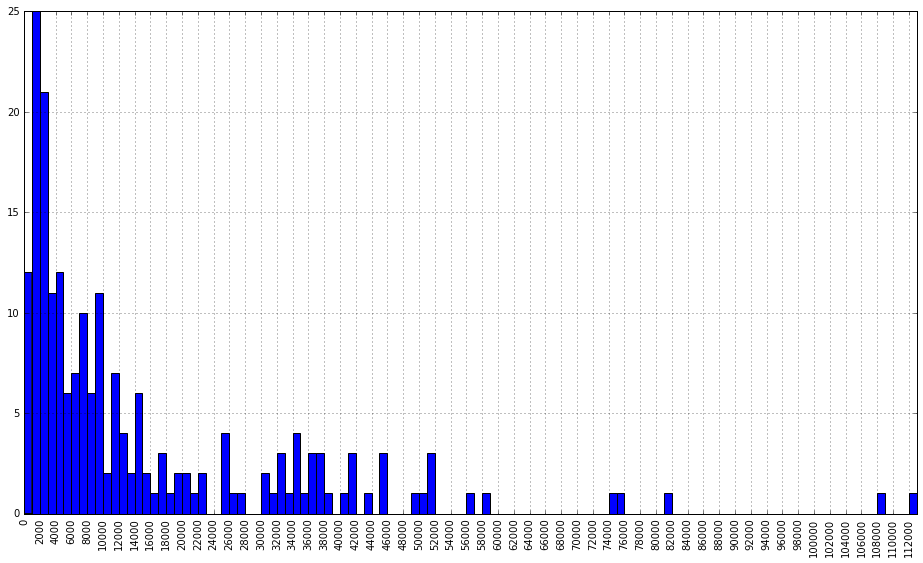

In [5]:
#your code here

#definitely a histogram
income_2000 = income_transpose.loc[2000]
income_bins = np.arange(0, income_2000.max() + 1000, 1000)
plt.figure(num=None, figsize=(16, 9), dpi=80)
plt.xticks(income_bins[::2], rotation=90)
income_2000.hist(bins=income_bins)
plt.show()

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [6]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here
def mergeByYear(year):
    income_year = income_transpose[income_transpose.index==year]
    #ugly list comprehension
    merged = [{'Country':country, 'Region':region,
               'Income':income_year[income_year.filter(regex=country).columns[0]].values[0]}
              for index, country, region in countries.itertuples()
              if len(income_year.filter(regex=country).columns) > 0] 
    return pd.DataFrame(merged)

mergeByYear(2010)

,Country,Income,Region
0,Algeria,12494.0,AFRICA
1,Angola,7047.0,AFRICA
2,Benin,1637.0,AFRICA
3,Botswana,13642.0,AFRICA
4,Burkina,1431.0,AFRICA
5,Burundi,725.0,AFRICA
6,Cameroon,2571.0,AFRICA
7,Cape Verde,6005.0,AFRICA
8,Central African Republic,901.0,AFRICA
9,Chad,1953.0,AFRICA


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

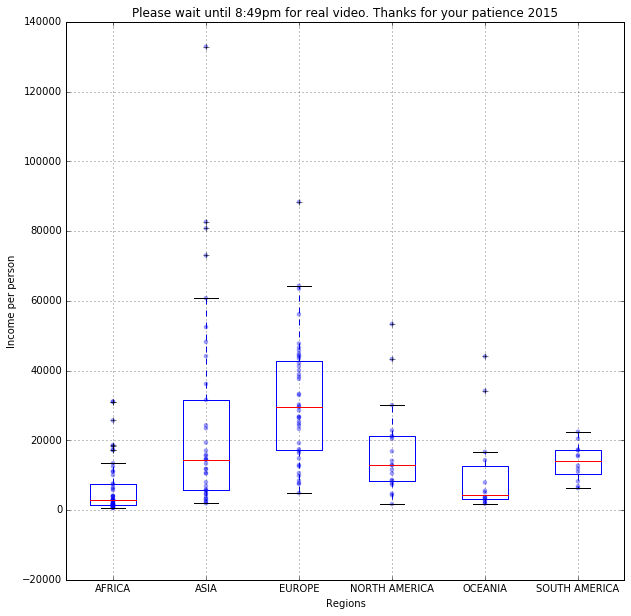

In [10]:
fig = plt.figure(figsize=(10,10))
years= range(1960, 2016)
N = len(years)

lines = plt.plot([], [], alpha=0.4, marker="o")[0]

def animate(i):
    fig.clear()
    plt.grid()
    plt.xlabel("Regions")
    plt.ylabel("Income per person")
    year=i
    plt.title("Please wait until 8:49pm for real video. Thanks for your patience %d" % year)
    region_income = mergeByYear(year)
    income_by_region = []
    regions = region_income["Region"].unique()
    i=0.0
    for idx, region in enumerate(regions):
        i+=1
        continent = region_income[region_income.Region == region]["Income"].values
        plt.scatter(np.full(len(continent),i), continent, alpha=0.4, edgecolors='none')
        income_by_region.append(continent)
    plt.boxplot(income_by_region)
    plt.xticks(np.arange(len(income_by_region))+1, regions)
    
    return lines,

anim = animation.FuncAnimation(fig, animate, years, blit=True)

#plt.show()
display(HTML(anim.to_html5_video()))


> Run the notebook again to see this animated

> In the recent years, the distribution of income has spread out a lot more. The average income has increased, especially in Europe. The income in some coutries has been increasing a lot, while other countries don't seem to have changed much over the years.

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


> Europe has been steadily expanding it's distribution of income throughout the years. Interestingly enough, Africa and South America have been left behind in the income race. A few countries in Asia grow at an incredible rate and suddenly took the lead in the world. North America and Oceania have been growing steadily too, but at really boring rates.